# Probabilidad Frecuentista

¿Cuál es la probabilidad de que sacar 4 al tirar un dado justo?
Usamos el código del notebook [EP1_ExperimentosAleatorios](https://github.com/eliasegn/ProbabilidadI/blob/main/EP1_ExperimentosAleatorios.ipynb)

In [59]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

def elegirde(lista):
  '''
  Parámetros
  lista : lista de donde elegirá uno aleatoriamente
  '''
  n = len(lista) # Longitud de la lista
  division = np.linspace(0,1,n+1) # Partición del [0,1] de n espacios
  u = random.random() # Número aleatorio entre 0 y 1
  k = None # Valor a elegir
  for i in range(len(division)):
    if division[i] <= u < division[i+1]: # Elegimos dependiendo de la partición
      k = i # k será el índice donde cayó el número aleatorio
  return lista[k]

dado = [1,2,3,4,5,6]
elegirde(dado)

4

¿Qué pasa si repetimos este proceso muchas veces?

In [60]:
iter = 10 # El número de iteraciones
for i in range(iter):
  print(elegirde(dado))

3
2
3
2
3
2
4
2
5
2


Pensaremos en una aproximación a los casos favorables entre los casos totales como lo que sigue:

$$\mathbb{P}(\text{Sale 4}) \approx \frac{\text{El número de veces que salió 4 en la simulación}}{\text{El número de iteracioes}}$$

In [61]:
iter = 100 # El número de iteraciones
contador4 = 0 # El contador
for i in range(iter):
  if elegirde(dado) == 4: # Si sale 4, agregamos al contador
    contador4 += 1

print('La aproximación es', contador4 / iter)

La aproximación es 0.13


¿Qué pasa si hacemos esto para algún otro número del dado?

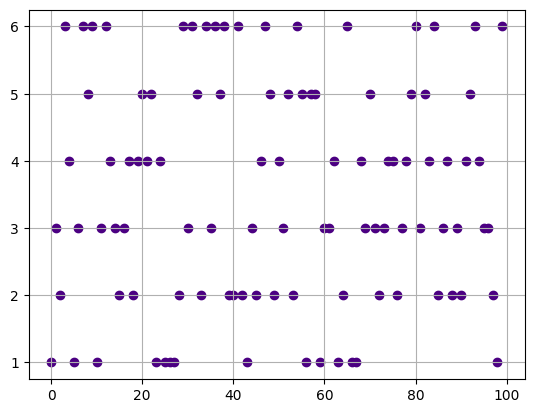

In [62]:
contador1 = 0
contador2 = 0
contador3 = 0
contador5 = 0
contador6 = 0
lanzamientos = []

for i in range(iter):
  lanzamiento = elegirde(dado)
  dado = [1,2,3,4,5,6]
  if lanzamiento == 1:
    contador1 += 1
  elif lanzamiento == 2:
    contador2 += 1
  elif lanzamiento == 3:
    contador3 += 1
  elif lanzamiento == 4:
    contador4 += 1
  elif lanzamiento == 5:
    contador5 += 1
  elif lanzamiento == 6:
    contador6 += 1
  lanzamientos.append(lanzamiento)

dominio2 = range(iter)

# Graficamos los resultados
plt.figure()
plt.scatter(dominio2, lanzamientos, color = 'indigo')
plt.grid()
plt.show()


### Histogramas

¿Qué es un histograma?

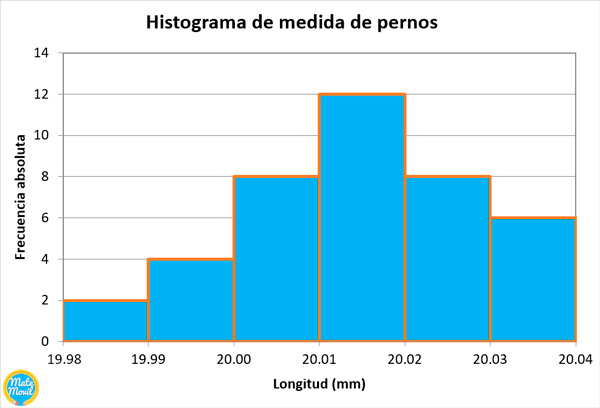

Veamos el histograma de nuestros datos

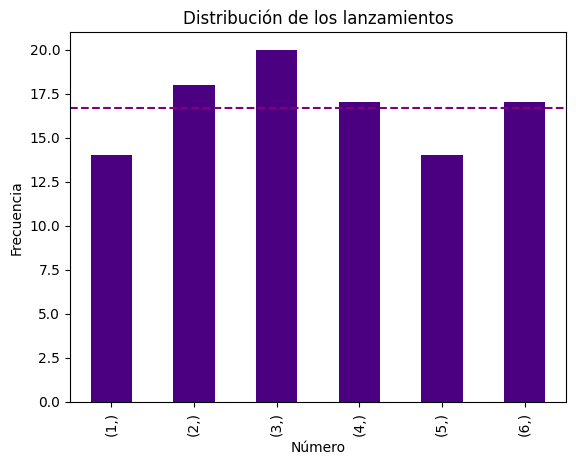

In [67]:
# Definimos un df con el número y las veces que fue lanzado
lanzamientos = pd.DataFrame(lanzamientos)

# Contamos el número de veces que aparece cada número
conteos = lanzamientos.value_counts().sort_index()

# Graficamos
plt.figure()
conteos.plot(kind='bar', color='indigo')
plt.axhline(y = 0.1666*iter, linestyle = '--', color = 'purple')
plt.title('Distribución de los lanzamientos')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.show()

Juntamos todo en un gran código para poder trabajar con él

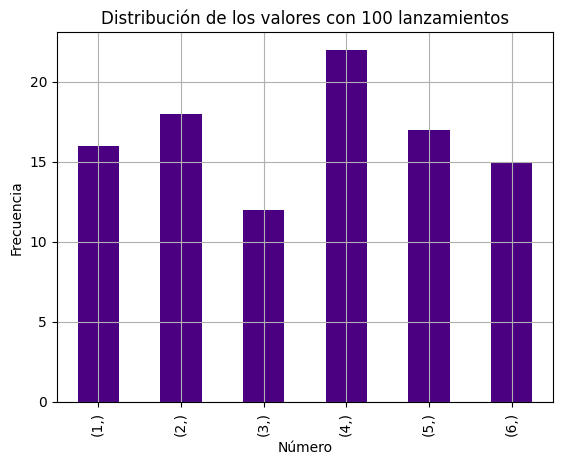

In [77]:
iter = 100 # El número de iteraciones

# Definimos contadores para cada valor del dado
contador1 = 0
contador2 = 0
contador3 = 0
contador4 = 0
contador5 = 0
contador6 = 0

lanzamientos = [] # Lista de lanzamientos

for i in range(iter):
  lanzamiento = elegirde(dado) # Lanzamos el dado
  if lanzamiento == 1:
    contador1 += 1
  elif lanzamiento == 2:
    contador2 += 1
  elif lanzamiento == 3:
    contador3 += 1
  elif lanzamiento == 4:
    contador4 += 1
  elif lanzamiento == 5:
    contador5 += 1
  elif lanzamiento == 6:
    contador6 += 1
  lanzamientos.append(lanzamiento)

dominio = range(iter)

# Definimos un df con el número y las veces que fue lanzado
lanzamientos = pd.DataFrame(lanzamientos)

# Contamos el número de veces que aparece cada número
conteos = lanzamientos.value_counts().sort_index()

# Graficamos
plt.figure()
conteos.plot(kind='bar', color='indigo')
#plt.axhline(y = 0.1666*iter, linestyle = '--', color = 'purple')
plt.title(f'Distribución de los valores con {iter} lanzamientos')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


¿Por qué podemos aproximar la probabilidad de esta manera?

# Probabilidad Frecuentista

Contaremos el número de veces que salió cada cara usando la función indicadora

$$\mathbb{1}_A(x) = \begin{cases}
1 \quad \text{si} \quad x\in A \\
0 \quad \text{si} \quad x \notin A
\end{cases}$$

Si $A$ es un evento, podemos aproximar su probabilidad calculando

$$\frac{\sum_{j=1}^{N}\mathbb{1}_A(\omega_j)}{N}$$

La cual, debido a la ley fuerte de los grandes números (que se ve al final del curso), converge a $\mathbb{P}(A)$